In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
torch.__version__
torch

'2.10.0'

In [66]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Dataset**

In [3]:
train_dataset=torchvision.datasets.MNIST('../data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST('../data',train=False,transform=transforms.ToTensor(),download=True)

100.0%
100.0%
100.0%
100.0%


In [24]:
# data是MNIST这个class的一个成员变量
print(train_dataset.data.shape,train_dataset.targets.shape)
print(test_dataset.data.shape,test_dataset.targets.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


In [22]:
train_dataset.data.dtype

torch.uint8

In [23]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [26]:
train_dataset.data.float().mean()

tensor(33.3184)

In [27]:
train_dataset.data.min(),train_dataset.data.max()

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

In [29]:
type(train_dataset[0])

tuple

In [37]:
# image,label=train_dataset.__getitem__(0)
image,label=train_dataset[0]
print(image.shape,label)

torch.Size([1, 28, 28]) 5


**Data Loader**
- 内存考虑

In [38]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=128,shuffle=True)

In [53]:
len(train_dataset)//64

937

In [51]:
len(train_loader)

938

In [69]:
images,labels=next(iter(train_loader))
print(images.shape,labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [64]:
a=torch.tensor([[1,2,3],[4,5,6]])
a.reshape(-1,3)


tensor([[1, 2, 3],
        [4, 5, 6]])

In [67]:
for batch_idx,(image,labels) in enumerate(train_loader):
    image=image.reshape(-1,28,28).to(device)
    if(batch_idx==len(train_loader)-1):
        print(image.shape,labels.shape)

torch.Size([32, 28, 28]) torch.Size([32])


In [56]:
32+64*937

60000

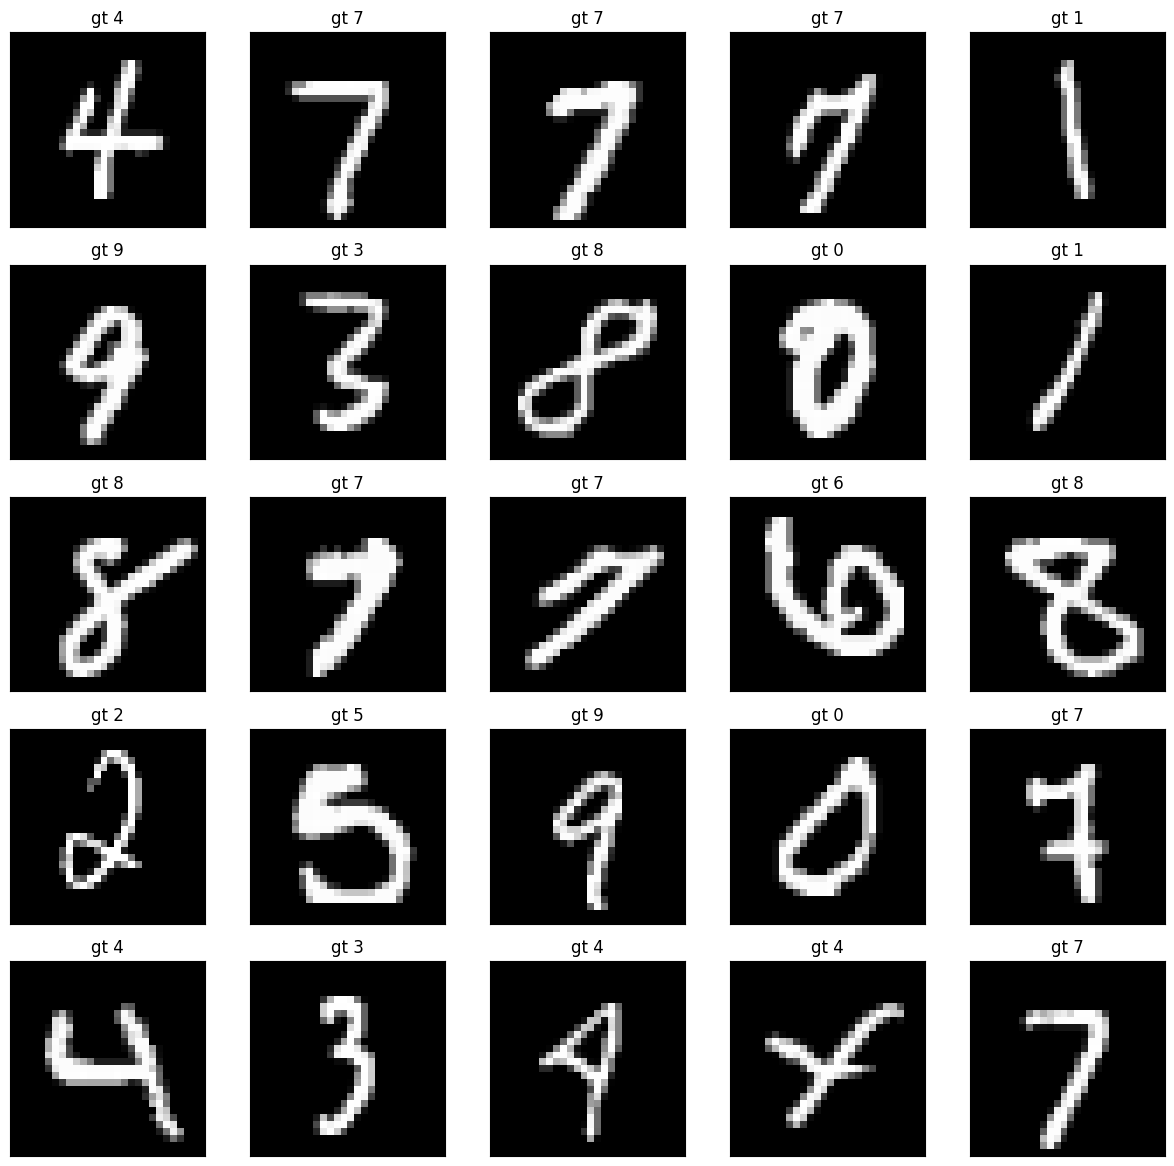

In [75]:
fig=plt.figure(figsize=(12,12))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0],cmap='grey')
    plt.title("gt {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

**FashionMNIST**

In [76]:
train_dataset=torchvision.datasets.FashionMNIST('../data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.FashionMNIST('../data',train=False,transform=transforms.ToTensor(),download=True)
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=128,shuffle=True)

100.0%
100.0%
100.0%
100.0%


In [77]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [80]:
images,labels=next(iter(train_loader))

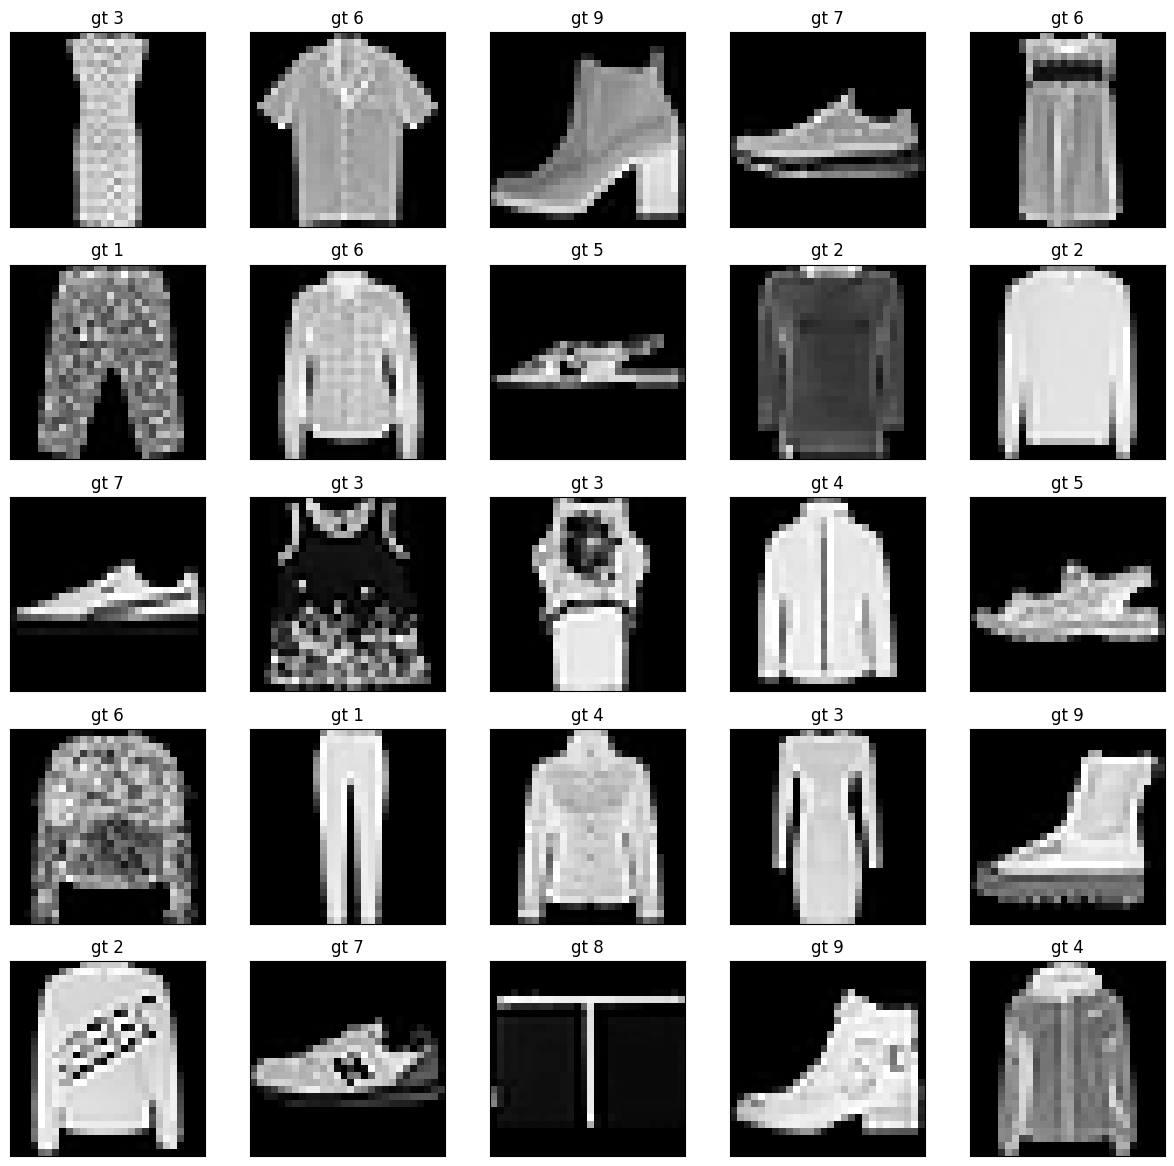

In [81]:
fig=plt.figure(figsize=(12,12))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0],cmap='grey')
    plt.title("gt {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

**Cifar**

In [83]:
train_dataset=torchvision.datasets.CIFAR10('../data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.CIFAR10('../data',train=False,transform=transforms.ToTensor(),download=True)
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=128,shuffle=True)

In [84]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [87]:
images,labels=next(iter(train_loader))
images.shape

torch.Size([64, 3, 32, 32])

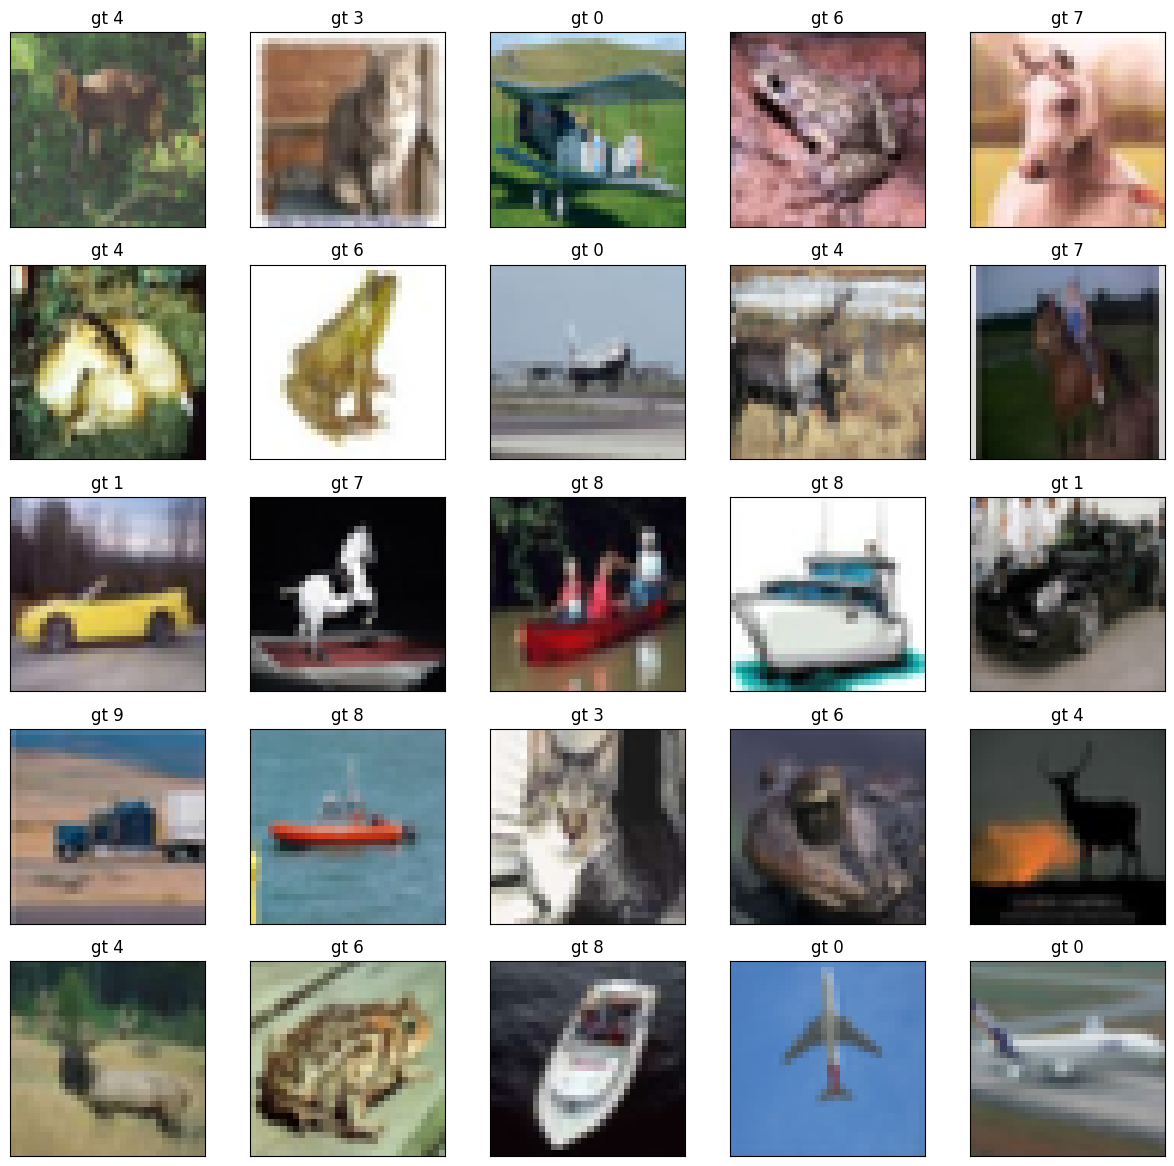

In [88]:
fig=plt.figure(figsize=(12,12))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(np.transpose(images[i],(1,2,0)))
    plt.title("gt {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])